In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')
PassengerId = test['PassengerId']



In [3]:
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_data = [train, test]

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

full_data = [train,test]

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


    
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

full_data = [train,test]

C:\Users\jackz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
full_data[0].head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Name_length,Has_Cabin
0,0,3,male,22,0,7.2500,S,2,0,Mr,23,0
1,1,1,female,38,0,71.2833,C,2,0,Mrs,51,1
2,1,3,female,26,0,7.9250,S,1,1,Miss,22,0


In [6]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)   
    dataset.loc[ dataset['Age'] <= 16, 'Age']  = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    

for dataset in full_data:    
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [7]:
train = full_data[0]
test = full_data[1]

In [8]:
train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Name_length,Has_Cabin
0,0,3,1,1,0,0,0,2,0,1,23,0
1,1,1,0,2,0,3,1,2,0,3,51,1
2,1,3,0,1,0,1,0,1,1,2,22,0
3,1,1,0,2,0,3,0,2,0,3,44,1
4,0,3,1,2,0,1,0,1,1,1,24,0


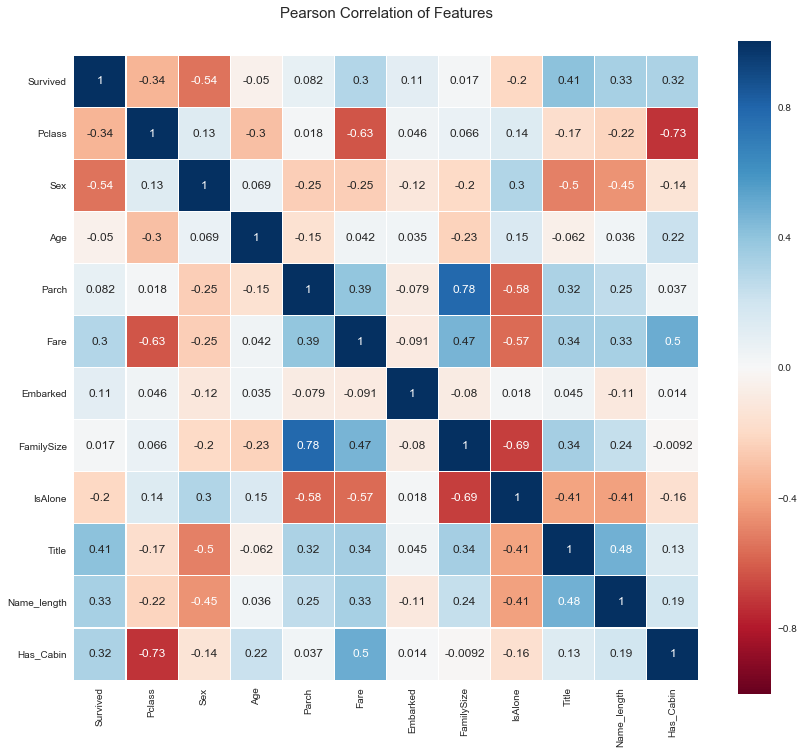

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


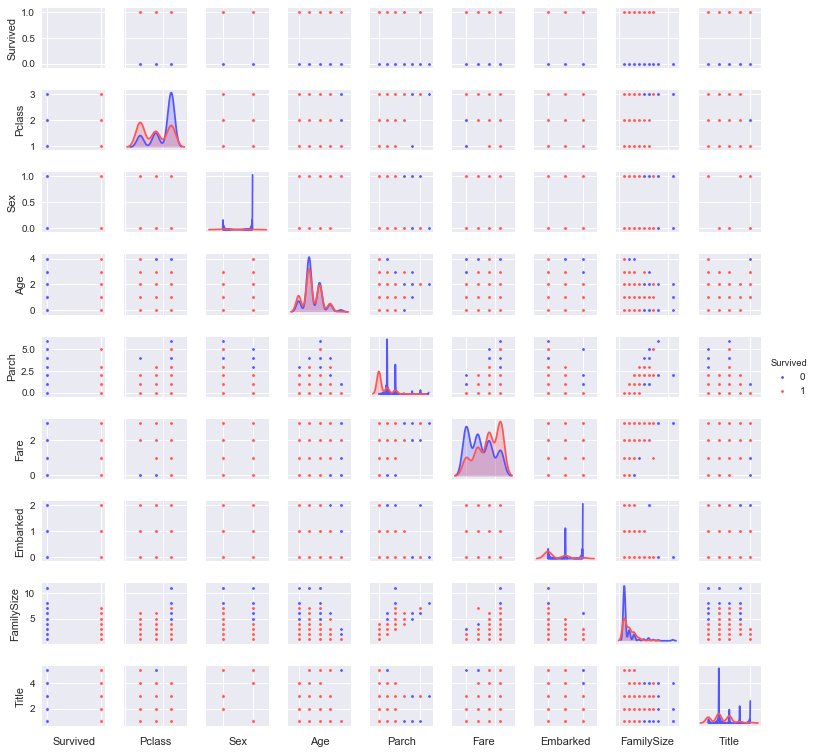

In [7]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

In [8]:
train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Name_length,Has_Cabin
0,0,3,1,1,0,0,0,2,0,1,23,0
1,1,1,0,2,0,3,1,2,0,3,51,1
2,1,3,0,1,0,1,0,1,1,2,22,0
3,1,1,0,2,0,3,0,2,0,3,44,1
4,0,3,1,2,0,1,0,1,1,1,24,0


In [9]:
predictors = ["Pclass","Sex","Age","Fare","Embarked","FamilySize","IsAlone","Title","Has_Cabin"]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

#3层交叉验证
kf = KFold(train.shape[0], n_folds=3, random_state=1)
#先拿逻辑回归预测
lr = LogisticRegression(C=1000.0, random_state=0)
#存储三部分预测结果
predictions=[]
#手动实施交叉验证算法
for tr,te in kf:
    train_predictors = train[predictors].iloc[tr,:]
    train_target = train["Survived"].iloc[tr]
    lr.fit(train_predictors,train_target)
    test_predictions = lr.predict(train[predictors].iloc[te,:])
    predictions.append(test_predictions)
#三部分预测结果合并为1个（819个，训练集的数据个数）
predictions = np.concatenate(predictions,axis=0)

In [11]:
#模型精度计算公式：预测对的个数/总的个数
accuracy = len(predictions[predictions==train["Survived"]])  / len(predictions)
accuracy

0.8103254769921436

In [17]:
from sklearn import cross_validation

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1,n_estimators=35,\
                    min_samples_split=2, min_samples_leaf=1)

kf = cross_validation.KFold(train.shape[0],n_folds=3,random_state=1)

scores = cross_validation.cross_val_score(rfc,   train[predictors],train["Survived"],cv=kf)
                                                     
print(scores.mean())

0.812570145903


In [19]:
from sklearn.ensemble import AdaBoostClassifier

adboost = AdaBoostClassifier(random_state=1,n_estimators=50,\
                            learning_rate=0.5)

kf = cross_validation.KFold(train.shape[0],n_folds=3,random_state=1)

scores = cross_validation.cross_val_score(adboost,\
                        train[predictors],train["Survived"],\
                                         cv=kf)
print(scores.mean())

0.819304152637


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=1,n_estimators=50,\
                            max_depth=5, min_samples_leaf=2, verbose=0)

kf = cross_validation.KFold(train.shape[0],n_folds=3,random_state=1)

scores = cross_validation.cross_val_score(gbc,\
                        train[predictors],train["Survived"],\
                                         cv=kf)
print(scores.mean())

0.820426487093


In [21]:
from sklearn.svm import SVC

sv = SVC(random_state=1,kernel='linear',C=0.02)

kf = cross_validation.KFold(train.shape[0],n_folds=3,random_state=1)

scores = cross_validation.cross_val_score(sv,\
                        train[predictors],train["Survived"],\
                                         cv=kf)
print(scores.mean())

0.81593714927


In [24]:
#随机森林得到的气泡特征图
rfc_features = rfc.fit(train[predictors],train["Survived"]).feature_importances_
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = rfc_features,
    x = predictors,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = rfc_features,
        colorscale='Portland',
        showscale=True
    ),
    text = predictors
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig)


'file://C:\\Users\\jackz\\Documents\\jupyter-notebook\\temp-plot.html'

In [25]:
#adboost得到的特征图
adboost_features = adboost.fit(train[predictors],train["Survived"]).feature_importances_
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = adboost_features,
    x = predictors,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = adboost_features,
        colorscale='Portland',
        showscale=True
    ),
    text = predictors
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Adaboost Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig)


'file://C:\\Users\\jackz\\Documents\\jupyter-notebook\\temp-plot.html'

In [26]:
#gradient boosting 得到的特征图
gbc_features = gbc.fit(train[predictors],train["Survived"]).feature_importances_
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = gbc_features,
    x = predictors,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = gbc_features,
        colorscale='Portland',
        showscale=True
    ),
    text = predictors
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig)


'file://C:\\Users\\jackz\\Documents\\jupyter-notebook\\temp-plot.html'

In [7]:
#########################
####第二阶段算法解读#####
#########################


In [40]:
#train:泰坦尼克号训练数据集
#test:泰坦尼克号测试集
ntrain = np.shape(train)[0]
ntest = np.shape(test)[0]
#交叉验证的份数
NFOLDS = 3

#返回经过clf分类器预测后的Survived结果，
#oof_train ：训练集的Survived情况
#oof_test：测试集的Survived情况
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index] #交叉验证中训练集x值
        y_tr = y_train[train_index] #交叉验证中训练集y值
        x_te = x_train[test_index] #交叉验证中测试集x值

        clf.fit(x_tr, y_tr) #训练阶段

        oof_train[test_index] = clf.predict(x_te) #交叉验证中测试集的x值
        
        #直接对测试集test做预测
        oof_test_skf[i, :] = clf.predict(x_test) 

    oof_test[:] = oof_test_skf.mean(axis=0)
    
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [41]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

rf_oof_train, rf_oof_test = get_oof(rfc,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(adboost, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gbc,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(sv,x_train, y_train, x_test) # Support Vector Classifier

x_train = np.concatenate((  rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [42]:
np.shape(x_train)

(891, 4)

In [43]:
np.shape(x_test)

(418, 4)

In [38]:
np.shape(x_test)

(418, 4)

In [45]:
import xgboost as xgb

In [46]:
print("开始计算")
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)
print("计算结束")

开始计算
计算结束


In [43]:
#这就是可以提交到Kaggle的结果
np.shape(predictions)

(418,)

In [ ]:
################
###########绘制特征重要程度的表格
###############

In [32]:
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': predictors,
     'Random Forest feature importances': rfc_features,
      'AdaBoost feature importances': adboost_features,
    'Gradient Boost feature importances': gbc_features
    })

In [33]:
feature_dataframe

,AdaBoost feature importances,Gradient Boost feature importances,Random Forest feature importances,features
0,0.06,0.088826,0.109940,Pclass
1,0.04,0.027359,0.192737,Sex
2,0.10,0.136057,0.101243,Age
3,0.08,0.147380,0.087720,Fare
4,0.04,0.066707,0.052622,Embarked
5,0.22,0.166877,0.127872,FamilySize
6,0.02,0.030719,0.018277,IsAlone
7,0.40,0.302423,0.252091,Title
8,0.04,0.033653,0.057498,Has_Cabin


In [34]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,AdaBoost feature importances,Gradient Boost feature importances,Random Forest feature importances,features,mean
0,0.06,0.088826,0.109940,Pclass,0.086255
1,0.04,0.027359,0.192737,Sex,0.086699
2,0.10,0.136057,0.101243,Age,0.112433


In [39]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig)

'file://C:\\Users\\jackz\\Documents\\jupyter-notebook\\temp-plot.html'